# part 1 : 课堂练习

## 社交网络

In [1]:
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family'] = 'sans-serif'

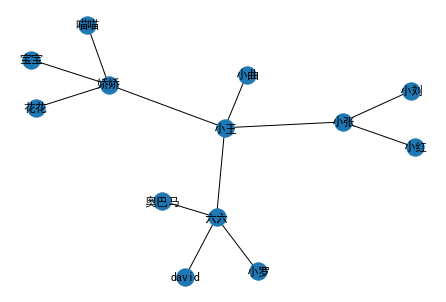

In [59]:
# 1. 字典类型 
social_network = {
    '小张': ['小刘', '小王', '小红'],
    '小王': ['六六', '娇娇', '小曲'],
    '娇娇': ['宝宝', '花花', '喵喵'],
    '六六': ['小罗', '奥巴马', 'david']
}
# social_network = (
#      ('娇娇','宝宝', '花花', '喵喵'),
#     ('小张','小刘', '小王', '小红'),
#     ('小王','六六', '娇娇', '小曲'),
   
#     ('六六','小罗', '奥巴马', 'david')
# )

# 社交网络图
social_grapg = nx.Graph(social_network)
nx.draw(social_grapg, with_labels=True)

In [56]:
# 搜索图
def search_graph(graph, start, mode='dfs'):
    """
    params:
        graph: 网络图
        start: 起点位置
        mode : 搜索模式，可选为：dfs(深度优先搜索)； bfs(广度优先搜索)
    return:
        expanded: 社交圈中的节点
    """
    expanded = []
    expand_positon = -1 if mode == 'dfs' else 0
    
    need_to_check  = [start]
    
    while need_to_check:
        person = need_to_check.pop(expand_positon)
        if person in expanded:
            continue
        new_expanded = graph.get(person, [])  # [] 代表若没有得到key，返回的是[]
        need_to_check.extend(new_expanded)    #   need_to_check += new_expanded
        expanded.append(person)
    
    return expanded   

In [57]:
search_graph(social_network, "娇娇")

['娇娇', '喵喵', '花花', '宝宝']

In [58]:
search_graph(social_network, "小张")

['小张',
 '小红',
 '小王',
 '小曲',
 '娇娇',
 '喵喵',
 '花花',
 '宝宝',
 '六六',
 'david',
 '奥巴马',
 '小罗',
 '小刘']

### 这种字典类型的social_network是否属于有向图的搜索？如上例中只能通过：小王->六六->奥巴马,而不能反向，因为字典的get获取到的是key

In [44]:
# 2. tuple类型
social_network_with_tuple = (
    ('小张', '小刘', '小王', '小红'),
    ('小王', '六六', '娇娇', '小曲'),
    ('娇娇', '宝宝', '花花', '喵喵'),
    ('六六', '小罗', '奥巴马'),
)


In [52]:
# 搜索图
def search_graph_2(graph, start, mode='dfs'):
    """
    params:
        graph: 网络图
        start: 起点位置
        mode : 搜索模式，可选为：dfs(深度优先搜索)； bfs(广度优先搜索)
    return:
        expanded: 社交圈中的节点
    """
    
    graph_len = len(graph)
    
    expanded = []
    expand_positon = -1 if mode == 'dfs' else 0
    
    need_to_check  = [start]
    
    while need_to_check:
        person = need_to_check.pop(expand_positon)
        if person in expanded:
            continue
        new_expanded = []
        for sub_graph in graph:
            if sub_graph[0] == person:
                new_expanded = list(sub_graph[1:])
                break        
        need_to_check += new_expanded # need_to_check.extend(new_expanded)
        expanded.append(person)
    
    return expanded   

In [55]:
search_graph_2(social_network_with_tuple, "小张")

['小张', '小红', '小王', '小曲', '娇娇', '喵喵', '花花', '宝宝', '六六', '奥巴马', '小罗', '小刘']

## 城市路线规划

In [60]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [63]:
import re

def get_city_info(city_coordination):
    city_location = {}
    for line in city_coordination.split("\n"):
        if line.startswith("//"): continue
        if line.strip() == "":continue
            
        city = re.findall("name:'(\w+)'",line)[0]
        x_y = re.findall("Coord:\[(\d+.\d+),\s(\d+.\d+)\]",line)[0]
        x_y = tuple(map(float,x_y))
        city_location[city] = x_y
    return city_location

In [64]:
city_info = get_city_info(coordination_source)
print(city_info)

{'兰州': (103.73, 36.03), '嘉峪关': (98.17, 39.47), '西宁': (101.74, 36.56), '成都': (104.06, 30.67), '石家庄': (114.48, 38.03), '拉萨': (102.73, 25.04), '贵阳': (106.71, 26.57), '武汉': (114.31, 30.52), '郑州': (113.65, 34.76), '济南': (117.0, 36.65), '南京': (118.78, 32.04), '合肥': (117.27, 31.86), '杭州': (120.19, 30.26), '南昌': (115.89, 28.68), '福州': (119.3, 26.08), '广州': (113.23, 23.16), '长沙': (113.0, 28.21), '沈阳': (123.38, 41.8), '长春': (125.35, 43.88), '哈尔滨': (126.63, 45.75), '太原': (112.53, 37.87), '西安': (108.95, 34.27), '北京': (116.46, 39.92), '上海': (121.48, 31.22), '重庆': (106.54, 29.59), '天津': (117.2, 39.13), '呼和浩特': (111.65, 40.82), '南宁': (108.33, 22.84), '银川': (106.27, 38.47), '乌鲁木齐': (87.68, 43.77), '香港': (114.17, 22.28), '澳门': (113.54, 22.19)}


In [66]:
import math

# 计算两点之间的距离
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

# 计算两个城市的距离
def get_city_distance(city1,city2):
    return geo_distance(city_info[city1],city_info[city2])

In [67]:
import networkx as nx
import matplotlib.pyplot as plt
# %matplotlib inline
# plt.rcParams['axes.unicode_minus'] = False
# plt.rcParams['font.sans-serif'] = ['msyh']

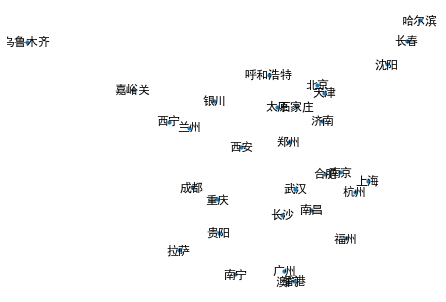

In [69]:
city_graph = nx.Graph()
city_graph.add_nodes_from(list(city_info.keys()))   
nx.draw(city_graph, city_info, with_labels=True, node_size=10)

In [72]:
# 城市间建立连接
from collections import defaultdict

threshold = 700

def build_connection(city_info):
    cities_connection = defaultdict(list)
    cities = list(city_info.keys())
    for c1 in cities:
        for c2 in cities:
            if c1 == c2:
                continue
            if get_city_distance(c1, c2) < threshold:
                cities_connection[c1].append(c2)
                
    return cities_connection


defaultdict(list,
            {'兰州': ['嘉峪关', '西宁', '成都', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'],
             '嘉峪关': ['兰州', '西宁', '成都', '拉萨'],
             '西宁': ['兰州', '嘉峪关', '成都', '拉萨', '贵阳', '重庆', '银川'],
             '成都': ['兰州', '嘉峪关', '西宁', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'],
             '石家庄': ['武汉',
              '郑州',
              '济南',
              '南京',
              '合肥',
              '南昌',
              '广州',
              '长沙',
              '太原',
              '西安',
              '北京',
              '天津',
              '呼和浩特'],
             '拉萨': ['兰州', '嘉峪关', '西宁', '成都', '贵阳', '重庆', '南宁', '银川'],
             '贵阳': ['兰州', '西宁', '成都', '拉萨', '西安', '重庆', '南宁', '银川'],
             '武汉': ['石家庄',
              '郑州',
              '济南',
              '南京',
              '合肥',
              '杭州',
              '南昌',
              '福州',
              '广州',
              '长沙',
              '太原',
              '西安',
              '北京',
              '天津',
              '呼和浩特',
  

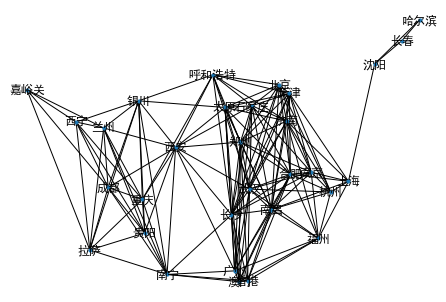

In [78]:
cities_connection = build_connection(city_info)
cities_connection_graph = nx.Graph(cities_connection)
nx.draw(cities_connection_graph, city_info, with_labels=True, node_size=10)
cities_connection

In [81]:
def search_1(graph,start,destination):
    pathes = [[start]]
    visited = set()
    
    while pathes:
        path = pathes.pop(0)
        print("当前path为:{}".format(path))
        froniter = path[-1]
        
        if froniter in visited: continue
            
        successsors = graph[froniter]
        print("当前successors为:{}".format(successsors))
        
        for city in successsors:
            if city in path: continue  # check loop
            
            new_path = path+[city]
            print("    new_path为:{}".format(new_path))
            
            #pathes.append(new_path)  #bfs
            pathes = [new_path] + pathes #dfs
            
            if city == destination:
                return new_path
        visited.add(froniter)

In [80]:
search_1(cities_connection,"上海","香港")

当前path为:['上海']
当前successors为:['济南', '南京', '合肥', '杭州', '南昌', '福州', '沈阳', '天津']
    new_path为:['上海', '济南']
    new_path为:['上海', '南京']
    new_path为:['上海', '合肥']
    new_path为:['上海', '杭州']
    new_path为:['上海', '南昌']
    new_path为:['上海', '福州']
    new_path为:['上海', '沈阳']
    new_path为:['上海', '天津']
当前path为:['上海', '天津']
当前successors为:['石家庄', '武汉', '郑州', '济南', '南京', '合肥', '杭州', '南昌', '长沙', '太原', '北京', '上海', '呼和浩特']
    new_path为:['上海', '天津', '石家庄']
    new_path为:['上海', '天津', '武汉']
    new_path为:['上海', '天津', '郑州']
    new_path为:['上海', '天津', '济南']
    new_path为:['上海', '天津', '南京']
    new_path为:['上海', '天津', '合肥']
    new_path为:['上海', '天津', '杭州']
    new_path为:['上海', '天津', '南昌']
    new_path为:['上海', '天津', '长沙']
    new_path为:['上海', '天津', '太原']
    new_path为:['上海', '天津', '北京']
    new_path为:['上海', '天津', '呼和浩特']
当前path为:['上海', '天津', '呼和浩特']
当前successors为:['石家庄', '武汉', '郑州', '济南', '长沙', '太原', '西安', '北京', '重庆', '天津', '银川']
    new_path为:['上海', '天津', '呼和浩特', '石家庄']
    new_path为:['上海', '天津', '呼和浩特', '武

['上海', '天津', '呼和浩特', '银川', '南宁', '香港']

In [82]:
def search_2(graph,start,destination,search_strategy):
    pathes = [[start]]
    #visited = set()
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        #if froniter in visited : continue
        #if froniter == destination:
        #    return path
        successsors = graph[froniter]
        
        for city in successsors:
            if city in path: continue  # check loop
            
            new_path = path+[city]
            
            pathes.append(new_path)  #bfs
            
        pathes = search_strategy(pathes)
       # visited.add(froniter)
        if pathes and (destination == pathes[0][-1]):
            return pathes[0]  
        
def sort_by_distance(pathes):
    def get_distance_of_path(path):
        distance = 0
        for i,_ in enumerate(path[:-1]):
            distance += get_city_distance(path[i],path[i+1])
        return distance
    return sorted(pathes,key=get_distance_of_path)

def get_distance_of_path(path):
    distance = 0
    for i,_ in enumerate(path[:-1]):
        distance += get_city_distance(path[i],path[i+1])
    return distance

In [84]:
get_distance_of_path(["北京","济南","上海"])

752.66259009181

In [85]:
search_2(cities_connection,"北京","上海",search_strategy=lambda x:x)

['北京', '济南', '上海']

In [86]:
search_2(cities_connection,"北京","上海",search_strategy=sort_by_distance)

['北京', '天津', '上海']

In [87]:
def Levenshtein_Distance_Recursive(str1, str2): 
    if len(str1) == 0: return len(str2) 
    elif len(str2) == 0: return len(str1) 
    elif str1 == str2: return 0 
    d = 0 if str1[len(str1)-1] == str2[len(str2)-1] else 1
    return min(Levenshtein_Distance_Recursive(str1, str2[:-1]) + 1, Levenshtein_Distance_Recursive(str1[:-1], str2) + 1, Levenshtein_Distance_Recursive(str1[:-1], str2[:-1]) + d)

In [89]:
print(Levenshtein_Distance_Recursive("abcdsafdsaf", "aad"))

8


# part 2 : 作业

In [90]:
import requests
import re
import numpy as np
r = requests.get('http://map.amap.com/service/subway?_1469083453978&srhdata=1100_drw_beijing.json')
r.text

'{"s":"北京市地铁","i":"1100","l":[{"st":[{"rs":"270 684|270 684","udpx":"270 687;270 681","su":"1","udsu":"1;1","n":"金安桥","sid":"110100023339035","p":"270 684","r":"900000069871|110100023339","udsi":"900000069872015;900000069871002","t":"1","si":"110100023339035","sl":"116.163167,39.923620","udli":"900000069872;900000069871","poiid":"BV10813545","lg":"0","sp":"jin an qiao"},{"rs":"226 684","udpx":"226 681;226 687","su":"1","udsu":"1;1","n":"四道桥","sid":"900000069871003","p":"226 684","r":"900000069871","udsi":"900000069871003;900000069872014","t":"0","si":"900000069871003","sl":"116.134010,39.916030","udli":"900000069871;900000069872","poiid":"BV10813547","lg":"0","sp":"si dao qiao"},{"rs":"181 684","udpx":"180 681;180 687","su":"1","udsu":"1;1","n":"桥户营","sid":"900000069871004","p":"181 684","r":"900000069871","udsi":"900000069871004;900000069872013","t":"0","si":"900000069871004","sl":"116.125809,39.912383","udli":"900000069871;900000069872","poiid":"BV10813541","lg":"0","sp":"qiao hu yin

In [114]:
import json
j_r = json.loads(r.text)
list(j_r)
#j_r['l'][0]['st'][0]['n']
j_r["l"][0]

{'st': [{'rs': '270 684|270 684',
   'udpx': '270 687;270 681',
   'su': '1',
   'udsu': '1;1',
   'n': '金安桥',
   'sid': '110100023339035',
   'p': '270 684',
   'r': '900000069871|110100023339',
   'udsi': '900000069872015;900000069871002',
   't': '1',
   'si': '110100023339035',
   'sl': '116.163167,39.923620',
   'udli': '900000069872;900000069871',
   'poiid': 'BV10813545',
   'lg': '0',
   'sp': 'jin an qiao'},
  {'rs': '226 684',
   'udpx': '226 681;226 687',
   'su': '1',
   'udsu': '1;1',
   'n': '四道桥',
   'sid': '900000069871003',
   'p': '226 684',
   'r': '900000069871',
   'udsi': '900000069871003;900000069872014',
   't': '0',
   'si': '900000069871003',
   'sl': '116.134010,39.916030',
   'udli': '900000069871;900000069872',
   'poiid': 'BV10813547',
   'lg': '0',
   'sp': 'si dao qiao'},
  {'rs': '181 684',
   'udpx': '180 681;180 687',
   'su': '1',
   'udsu': '1;1',
   'n': '桥户营',
   'sid': '900000069871004',
   'p': '181 684',
   'r': '900000069871',
   'udsi': '9000

In [131]:
def get_lines_stations_info(text):
    # 请在这里写上你的代码
    # 使用json来解析网页内容
    j_r = json.loads(text)
    

    # 遍历text格式数据，组成地点数据结构
    # 所有线路信息的dict：key：线路名称；value：站点名称list
    lines_info = {}
    
    # 所有站点信息的dict：key：站点名称；value：站点坐标(x,y)
    stations_info = {}
    
    for line in j_r['l']:
        stations = []
        for station in line['st']:
            stations.append(station['n']) # 站点添加
            stations_info[station['n']] = tuple([float(num) for num in station['sl'].split(',')])   # 站点坐标添加
        lines_info[line['ln']] = stations
        
    return lines_info, stations_info

    
    
lines_info, stations_info = get_lines_stations_info(r.text)
lines_info
stations_info



{'金安桥': (116.163167, 39.92362),
 '四道桥': (116.13401, 39.91603),
 '桥户营': (116.125809, 39.912383),
 '上岸': (116.122225, 39.905138),
 '栗园庄': (116.123254, 39.89578),
 '小园': (116.114443, 39.890465),
 '石厂': (116.100334, 39.889378),
 '苹果园': (116.177388, 39.926727),
 '古城': (116.190337, 39.90745),
 '八角游乐园': (116.212684, 39.907442),
 '八宝山': (116.235948, 39.90744),
 '玉泉路': (116.252888, 39.907433),
 '五棵松': (116.273987, 39.907456),
 '万寿路': (116.294765, 39.907474),
 '公主坟': (116.309919, 39.907469),
 '军事博物馆': (116.321459, 39.907422),
 '木樨地': (116.337583, 39.907379),
 '南礼士路': (116.352583, 39.907234),
 '复兴门': (116.356866, 39.907242),
 '西单': (116.374072, 39.907383),
 '天安门西': (116.391278, 39.907472),
 '天安门东': (116.401216, 39.90778),
 '王府井': (116.411571, 39.908069),
 '东单': (116.41848, 39.908325),
 '建国门': (116.435806, 39.908501),
 '永安里': (116.450497, 39.908454),
 '国贸': (116.461841, 39.909104),
 '大望路': (116.475783, 39.908287),
 '四惠': (116.495456, 39.908749),
 '四惠东': (116.515664, 39.908495),
 '积水潭': (116.373126

In [132]:
# 根据线路信息，建立站点邻接表dict
def get_neighbor_info(lines_info):
    pass

    # 把str2加入str1站点的邻接表中
    def add_neighbor_dict(info, str1, str2):
        list1 = info.get(str1)
        if not list1:
            list1 = []
        list1.append(str2)
        info[str1] = list1
        return info
     
    # 根据线路信息，建立站点邻接表dict
    neighbor_info = {}
    for line_name, station_list in lines_info.items():
        for i in range(len(station_list) - 1):
            sta1 = station_list[i]
            sta2 = station_list[i+1]
            neighbor_info = add_neighbor_dict(neighbor_info, sta1, sta2)
            neighbor_info = add_neighbor_dict(neighbor_info, sta2, sta1)
            
    return neighbor_info
        
neighbor_info = get_neighbor_info(lines_info)
neighbor_info

{'金安桥': ['四道桥', '杨庄'],
 '四道桥': ['金安桥', '桥户营'],
 '桥户营': ['四道桥', '上岸'],
 '上岸': ['桥户营', '栗园庄'],
 '栗园庄': ['上岸', '小园'],
 '小园': ['栗园庄', '石厂'],
 '石厂': ['小园'],
 '苹果园': ['古城'],
 '古城': ['苹果园', '八角游乐园'],
 '八角游乐园': ['古城', '八宝山'],
 '八宝山': ['八角游乐园', '玉泉路'],
 '玉泉路': ['八宝山', '五棵松'],
 '五棵松': ['玉泉路', '万寿路'],
 '万寿路': ['五棵松', '公主坟'],
 '公主坟': ['万寿路', '军事博物馆', '莲花桥', '西钓鱼台'],
 '军事博物馆': ['公主坟', '木樨地', '北京西站', '白堆子'],
 '木樨地': ['军事博物馆', '南礼士路'],
 '南礼士路': ['木樨地', '复兴门'],
 '复兴门': ['南礼士路', '西单', '长椿街', '阜成门'],
 '西单': ['复兴门', '天安门西', '宣武门', '灵境胡同'],
 '天安门西': ['西单', '天安门东'],
 '天安门东': ['天安门西', '王府井'],
 '王府井': ['天安门东', '东单'],
 '东单': ['王府井', '建国门', '崇文门', '灯市口'],
 '建国门': ['东单', '永安里', '朝阳门', '北京站'],
 '永安里': ['建国门', '国贸'],
 '国贸': ['永安里', '大望路', '金台夕照', '双井'],
 '大望路': ['国贸', '四惠', '金台路', '九龙山'],
 '四惠': ['大望路', '四惠东', '四惠东'],
 '四惠东': ['四惠', '四惠', '高碑店'],
 '积水潭': ['鼓楼大街'],
 '鼓楼大街': ['积水潭', '安定门', '什刹海', '安德里北街'],
 '安定门': ['鼓楼大街', '雍和宫'],
 '雍和宫': ['安定门', '东直门', '北新桥', '和平里北街'],
 '东直门': ['雍和宫', '东四十条', '柳芳', '三元桥'],
 '东四十条'

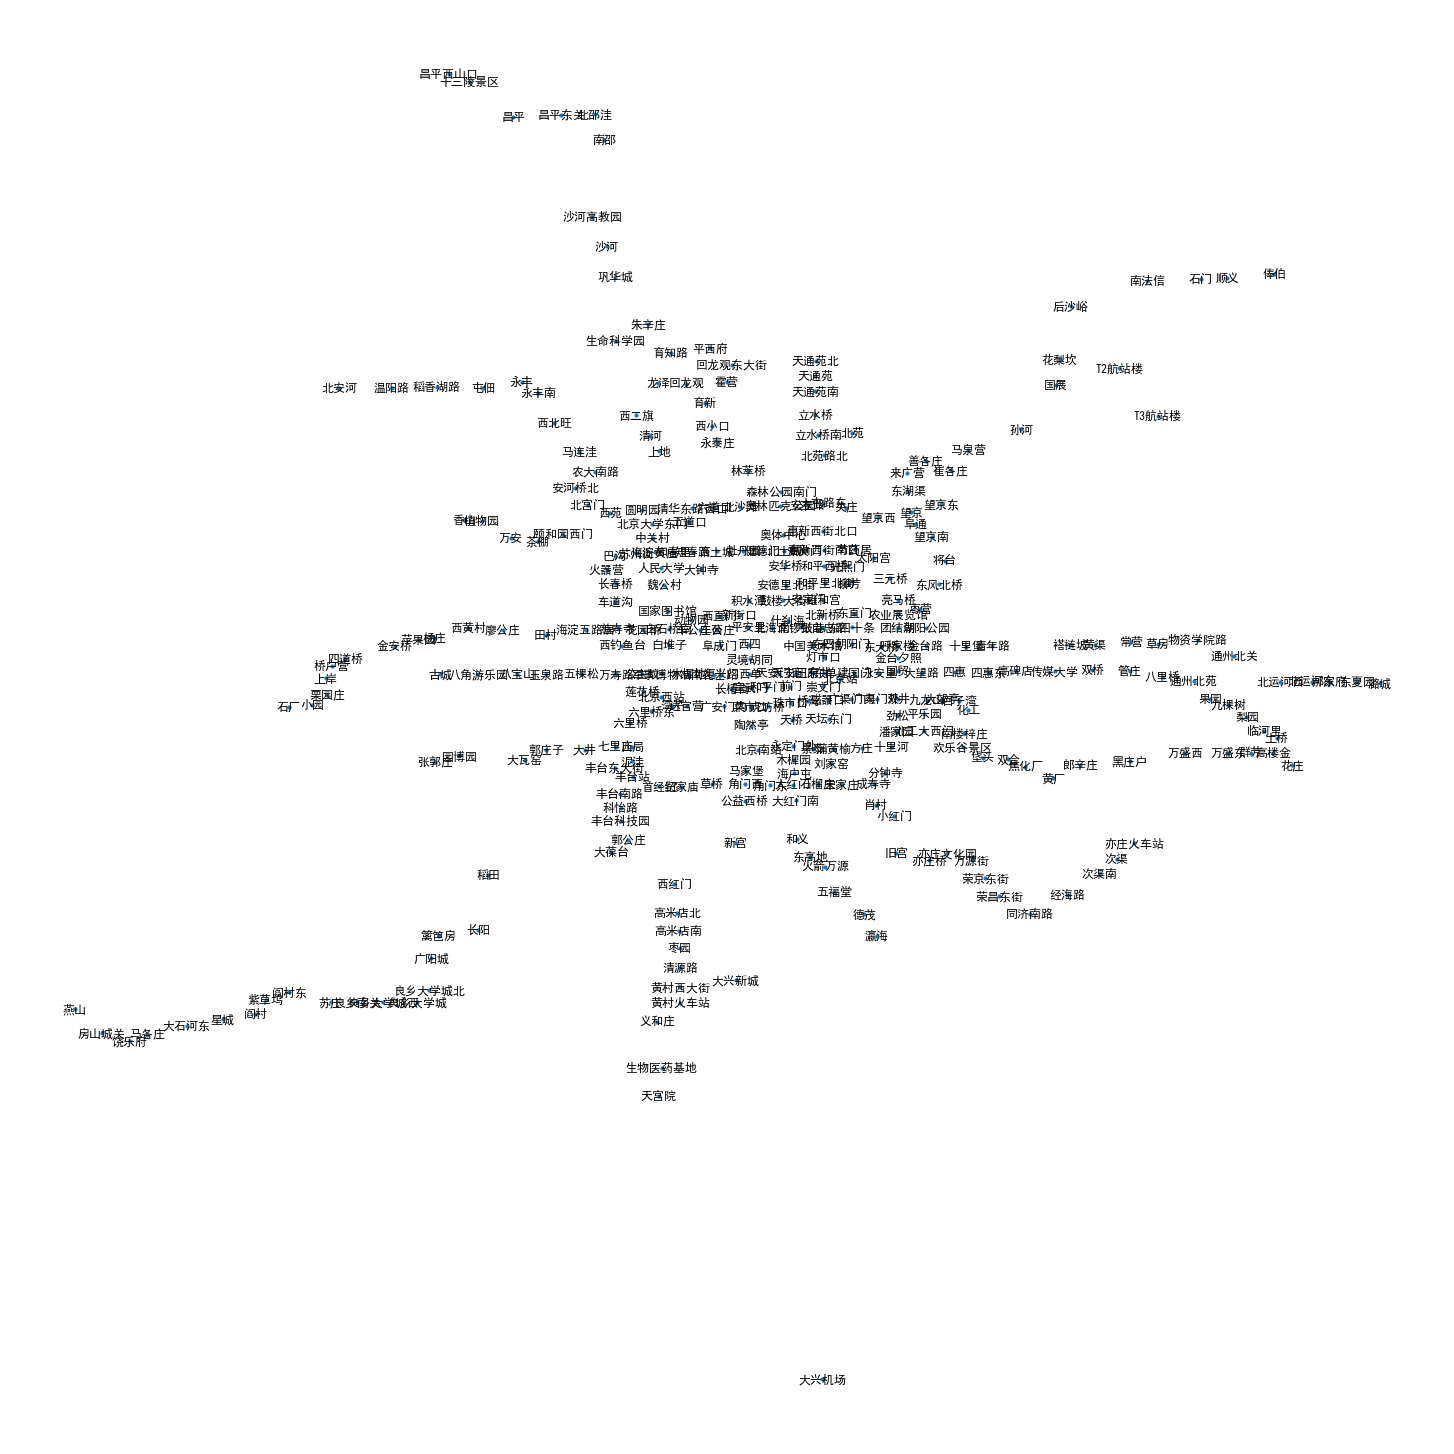

In [133]:
# 画地铁图
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt

# 如果汉字无法显示，请参照
matplotlib.rcParams['font.sans-serif'] = ['SimHei'] 
matplotlib.rcParams['font.family'] = 'sans-serif'

# 画图
plt.figure(figsize=(20,20))
stations_graph = nx.Graph()
stations_graph.add_nodes_from(list(stations_info.keys()))
nx.draw(stations_graph, stations_info, with_labels=True, node_size=10)

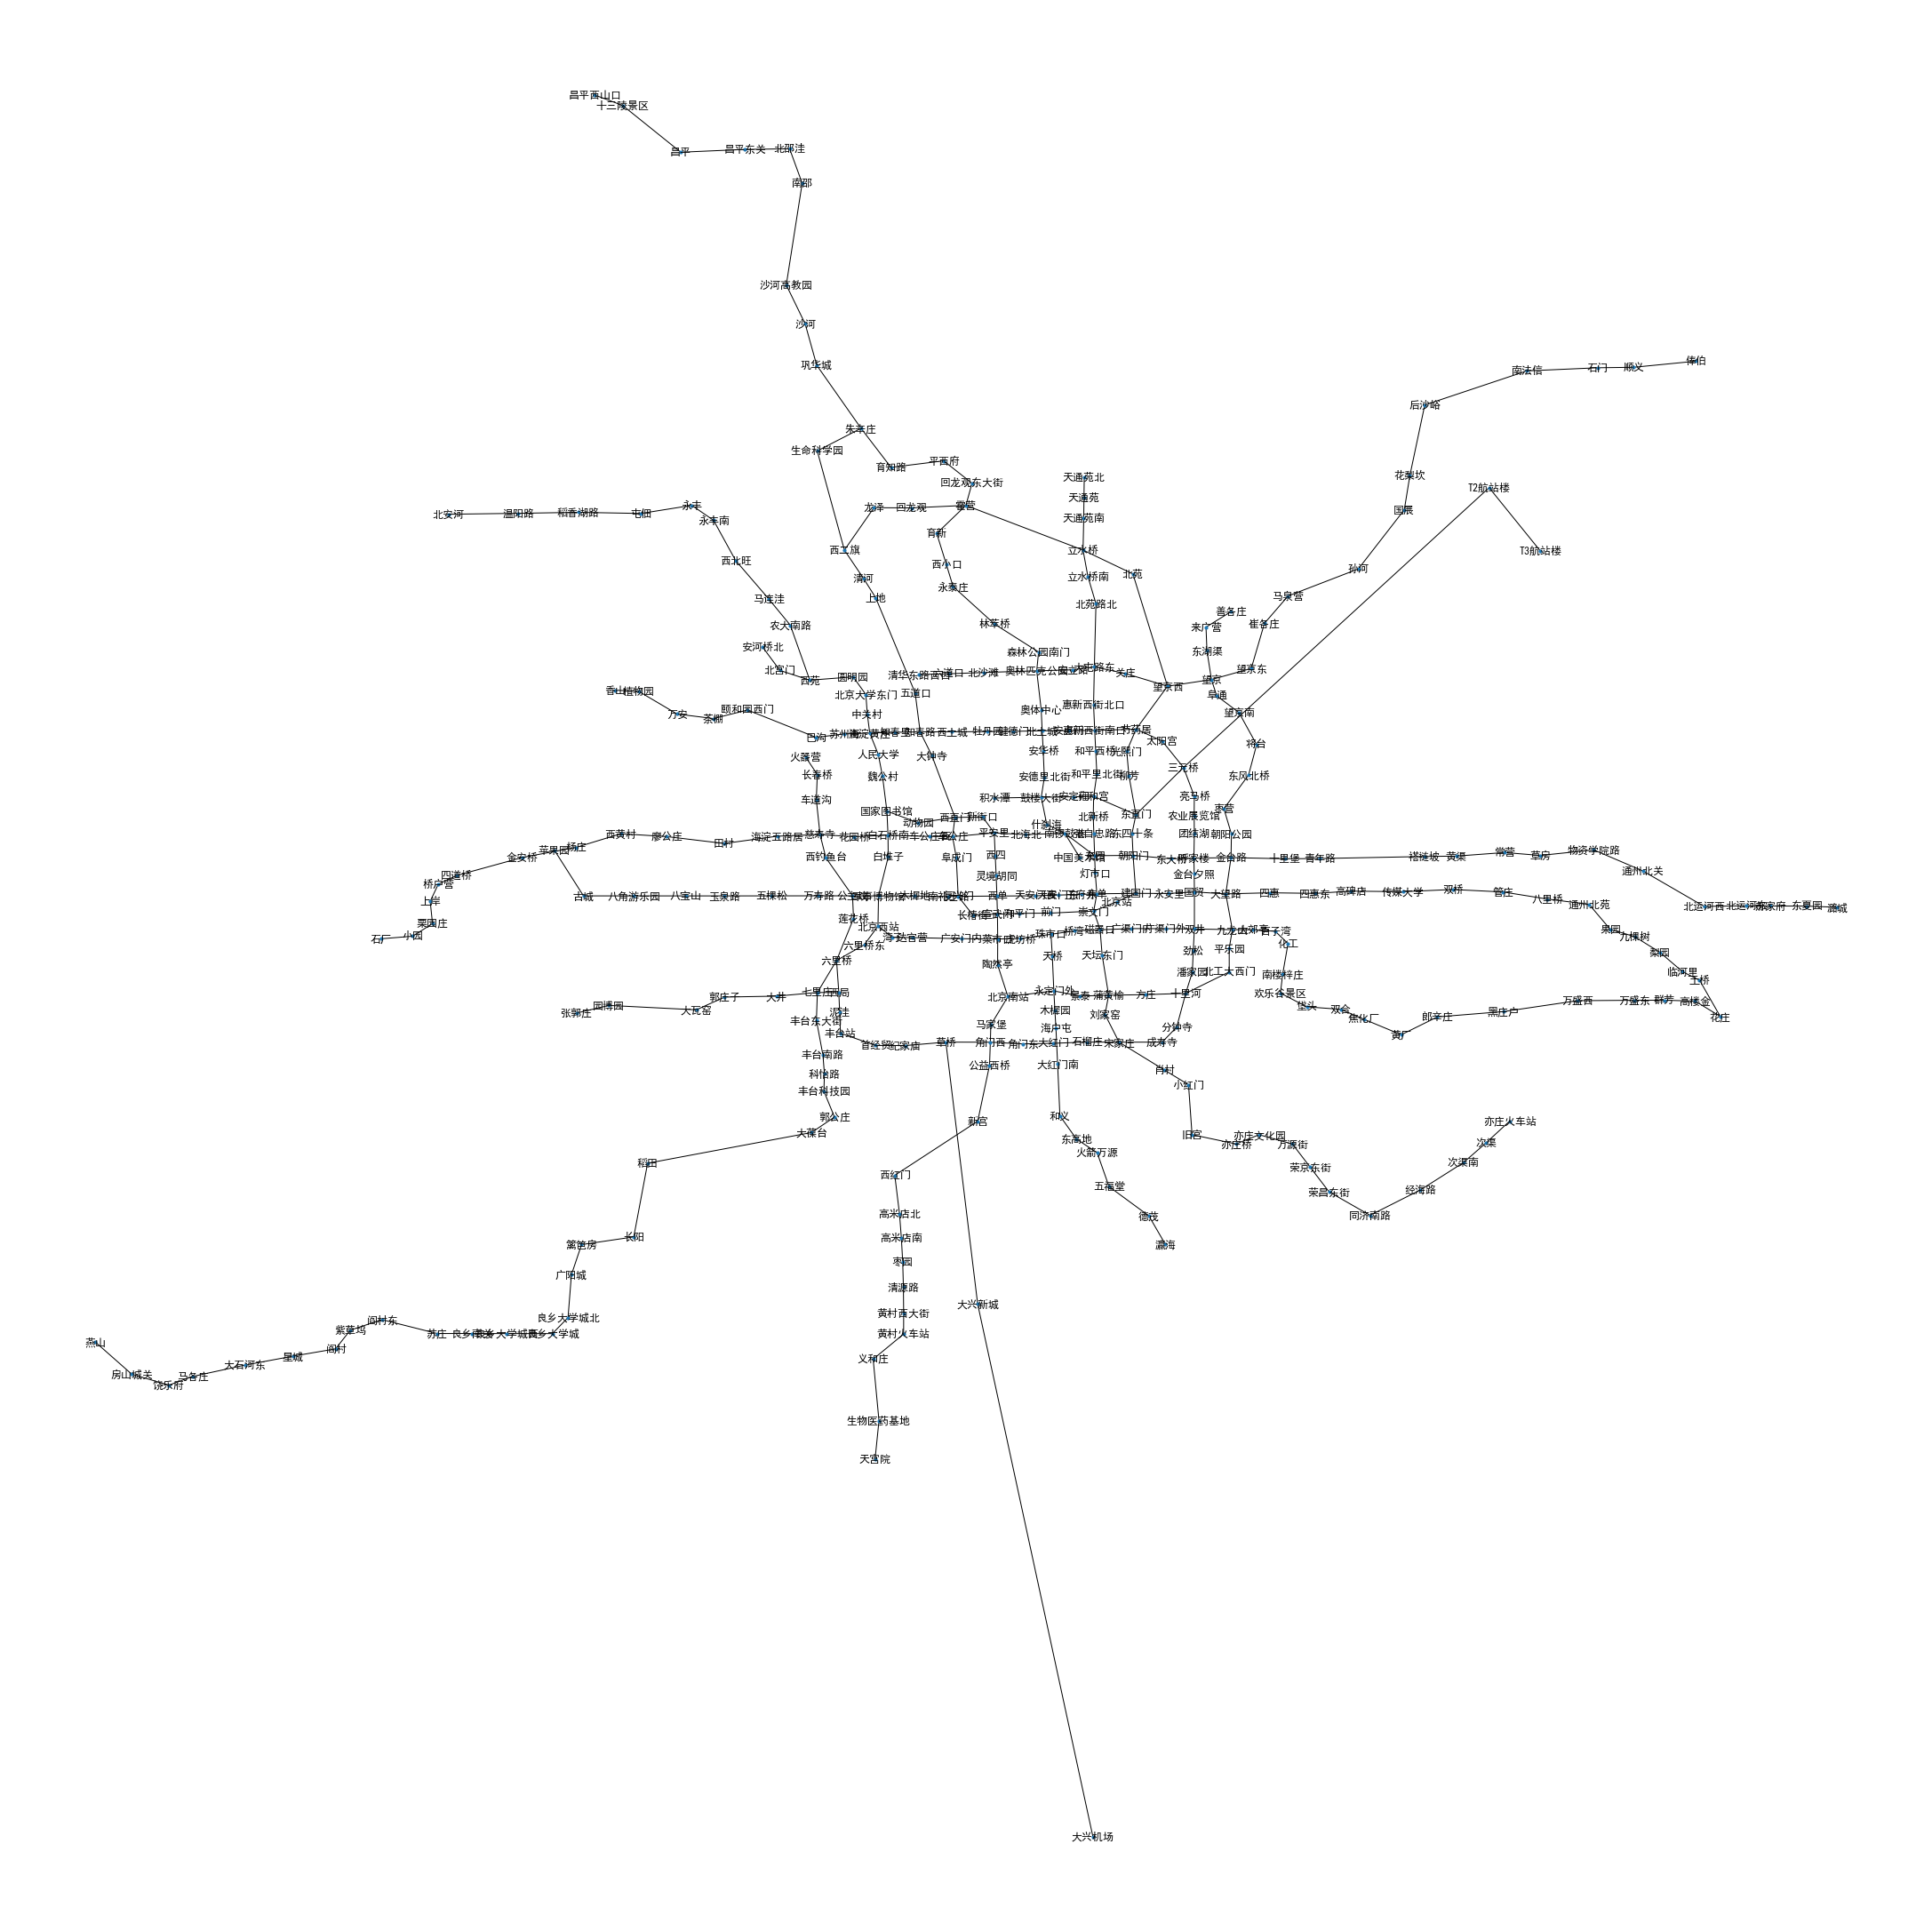

In [135]:
stations_connection_graph = nx.Graph(neighbor_info)
plt.figure(figsize=(30,30))
nx.draw(stations_connection_graph, stations_info, with_labels=True, node_size=10)

In [137]:
# 你可以用递归查找所有路径

def get_next_station_DFS_ALL(node, neighbor_info, to_station):
    neighbors = node.get('neighbors')
    pre_station = node.get('this_station')
    path = node.get('path')
    paths = []
    for neighbor in neighbors:
        this_station = neighbor
        if this_station in path:
            # 如果此站点已经在路径中，说明不通，是环路
            return None
        if neighbor == to_station:
            # 找到终点，返回路径
            path.append(to_station)
            paths.append(path)
        else:
            neighbors_ = neighbor_info.get(this_station).copy()
            neighbors_.remove(pre_station)
            path_ = path.copy()
            path_.append(this_station)
            new_node = {'pre_station':pre_station,
                        'this_station':this_station,
                        'neighbors':neighbors_,
                        'path':path_}
            paths_ = get_next_station_DFS_ALL(new_node, neighbor_info, to_station)
            if paths_:
                paths.extend(paths_)        # 此处不是append ?
                
    return paths

def get_path_DFS_ALL(lines_info, neighbor_info, from_station, to_station):
    # 递归算法，本质上是深度优先
    # 遍历所有路径
    # 这种情况下，站点间的坐标距离难以转化为可靠的启发函数，所以只用简单的BFS算法
    # 检查输入站点名称
    if not neighbor_info.get(from_station):
        print("起始点{}不存在，请正确输入！".format(from_station))
    if not neighbor_info.get(to_station):
        print("目的站点{}不存在，请正确输入！".format(from_station))
    
    path = []
    this_station = from_station
    path.append(this_station)
    neighbors = neighbor_info.get(this_station)
    node = {'pre_station':'',
            'this_station':this_station,
            'neighbors':neighbors,
            'path':path}
    
    return get_next_station_DFS_ALL(node, neighbor_info, to_station)


paths = get_path_DFS_ALL(lines_info, neighbor_info, '回龙观', '西二旗')
print('共有%d种路径。'%len(paths))
for item in paths:
    print("此路径总计%d站:"%(len(item)-1))
    print('-'.join(item))

KeyboardInterrupt: 

In [143]:
#  你也可以使用第二种算法：没有启发函数的简单宽度优先

def get_path_BFS(lines_info, neighbor_info, from_station, to_station):
    # 搜索策略：以站点数量为cost（因为车票价格是按站算的）
    # 这种情况下，站点间的坐标距离难以转化为可靠的启发函数，所以只用简单的BFS算法
    # 由于每深一层就是cost加1，所以每层的cost都相同，算和不算没区别，所以省略
    # 检查输入站点名称
    if not neighbor_info.get(from_station):
        print('起始站点“%s”不存在。请正确输入！'%from_station)
        return None
    if not neighbor_info.get(to_station):
        print('目的站点“%s”不存在。请正确输入！'%to_station)
        return None
    
    # 搜索节点是个dict，key=站名，value是包含路过的站点list
    nodes = {}
    nodes[from_station] = [from_station]
    print(nodes.keys())
    print(nodes.items())
    while True:
        new_nodes = {}
        for (k,v) in nodes.items():
            print(k,v)
            #k = from_station
            #v = nodes[from_station]
            neighbor = neighbor_info.get(k).copy()
            if len(v)>=2:
                # 不往上一站走
                pre_station = v[-2]
                neighbor.remove(pre_station)
            for station in neighbor:
                # 遍历邻居
                if station in nodes:
                    # 跳过已搜索过的节点
                    continue
                path = v.copy()
                path.append(station)
                new_nodes[station] = path
                if station == to_station:
                    # 找到路径，结束
                    return path
        nodes = new_nodes
    
    print("未能找到路径")
    return None


paths = get_path_BFS(lines_info, neighbor_info, '回龙观', '西二旗')
print("路径总计%d站。"%(len(paths)-1))
print("-".join(paths))
# 高德导航是31站，只有1次换乘
# 代码结果是28站，但是有5次换乘
# 猜测高德的路径cost主要是时间

dict_keys(['回龙观'])
dict_items([('回龙观', ['回龙观'])])
回龙观 ['回龙观']
龙泽 ['回龙观', '龙泽']
路径总计2站。
回龙观-龙泽-西二旗


In [144]:
# 你还可以用第三种算法：以路径路程为cost的启发式搜索

import pandas as pd
def get_path_Astar(lines_info, neighbor_info, stations_info, from_station, to_station):
    # 搜索策略：以路径的站点间直线距离累加为cost，以当前站点到目标的直线距离为启发函数
    # 检查输入站点名称
    if not neighbor_info.get(from_station):
        print('起始站点“%s”不存在。请正确输入！'%from_station)
        return None
    if not neighbor_info.get(to_station):
        print('目的站点“%s”不存在。请正确输入！'%to_station)
        return None
    
    # 计算所有节点到目标节点的直线距离，备用
    distances = {}
    x,y = stations_info.get(to_station)
    for (k,v) in stations_info.items():
        x0,y0 = stations_info.get(k)
        l = ((x-x0)**2 + (y-y0)**2)**0.5
        distances[k] = l
        
    # 已搜索过的节点，dict
    # key=站点名称，value是已知的起点到此站点的最小cost
    searched = {}
    searched[from_station] = 0
    
    # 数据结构为pandas的dataframe
    # index为站点名称
    # g为已走路径，h为启发函数值（当前到目标的直线距离）
    nodes = pd.DataFrame([[[from_station], 0, 0, distances.get(from_station)]],
                         index=[from_station], columns=['path', 'cost', 'g', 'h']) 
    
    count = 0
    while True:
        if count > 1000:
            break
        nodes.sort_values('cost', inplace=True)
        for index, node in nodes.iterrows():
            count += 1
            # 向邻居中离目的地最短的那个站点搜索
            neighbors = neighbor_info.get(index).copy()
            if len(node['path']) >= 2:
                # 不向这个路径的反向去搜索
                neighbors.remove(node['path'][-2])
            for i in range(len(neighbors)):
                count += 1
                neighbor = neighbors[i]
                g = node['g'] + get_distance(stations_info, index, neighbor)
                h = distances[neighbor]
                cost = g + h
                path = node['path'].copy()
                path.append(neighbor)
                if neighbor == to_station:
                    # 找到目标，结束
                    print('共检索%d次。'%count)
                    return path
                if neighbor in searched:
                    if g >= searched[neighbor]:
                        # 说明现在搜索的路径不是最优，忽略
                        continue
                    else:
                        searched[neighbor] = g
                        # 修改此站点对应的node信息
#                         nodes.loc[neighbor, 'path'] = path # 这行总是报错
#                         nodes.loc[neighbor, 'cost'] = cost
#                         nodes.loc[neighbor, 'g'] = g
#                         nodes.loc[neighbor, 'h'] = h
                        # 不知道怎么修改df中的list元素，只能删除再新增行
                        nodes.drop(neighbor, axis=0, inplace=True)
                        row = pd.DataFrame([[path, cost, g, h]],
                                       index=[neighbor], columns=['path', 'cost', 'g', 'h'])
                        nodes = nodes.append(row)
                        
                else:
                    searched[neighbor] = g
                    row = pd.DataFrame([[path, cost, g, h]],
                                       index=[neighbor], columns=['path', 'cost', 'g', 'h'])
                    nodes = nodes.append(row)
            # 这个站点的所有邻居都搜索完了，删除这个节点
            nodes.drop(index, axis=0, inplace=True)

        # 外层for循环只跑第一行数据，然后重新sort后再计算
        continue         
        
    print('未能找到路径')
    return None

def get_distance(stations_info, str1, str2):
    x1,y1 = stations_info.get(str1)
    x2,y2 = stations_info.get(str2)
    return ((x1-x2)**2 + (y1-y2)**2)** 0.5

paths = get_path_Astar(lines_info, neighbor_info, stations_info, '回龙观', '西二旗')
if paths:
    print("路径总计%d站。"%(len(paths)-1))
    print("-".join(paths))
# 高德导航是31站，只有1次换乘
# 代码结果是28站，与以地铁站数为cost的结果相同，但是路径不同（从第一种遍历的算法能看到，28站到达目的地的路径有3种）
# 猜测高德的路径cost主要是时间

共检索5次。
路径总计2站。
回龙观-龙泽-西二旗
